In [1]:
# Install required library

!pip install sentence_transformers -q

In [2]:
import re
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt


In [3]:
import numpy as np

In [4]:
import json

In [5]:
null = None

In [6]:
# Job description for matching  
job_description = """Looking for candidate with 3+ years of experience.  
Must have strong skills in Python (Scikit-learn, TensorFlow, PyTorch), SQL (Spark/Hadoop/ETL), and cloud platforms (AWS/GCP/Azure).  
Experience in NLP, LLMs, GenAI, statistical analysis, and data visualization (Tableau/Power BI) is preferred.  
Remote or based in Mumbai, Bangalore, or Pune."""  

In [7]:
f1="/kaggle/input/rankerinput44/resume_data_2_pdf1.json"
f2="/kaggle/input/rankerinput44/resume_data_5_pdf2.json"
f3="/kaggle/input/rankerinput44/resume_data_3_pdf3.json"
f4="/kaggle/input/rankerinput44/resume_data_4_pdf4.json"
f5="/kaggle/input/rankerinput44/resume_data_1_pdf5.json"

In [8]:
files = [f1,f2,f3,f4,f5]

In [9]:
# Properly open and read each file
docs = []
for file_path in files:
    with open(file_path, 'r') as f:  # Opens the file
        docs.append(json.load(f))    # Loads JSON content
# If the resume ranker expects a list of dictionaries, wrap the dictionary in a list
resume_data_list = docs

In [10]:
resume_data_list

[{'Contact Information': {'Name': None,
   'Email': None,
   'Phone Number': None,
   'Website/Portfolio/LinkedIn': None,
   'Github Profile': None},
  'Education': [{'Institution Name': 'Binghamton University, State University of New York',
    'Degree': 'Masters of Science : Industrial and Systems Engineering',
    'Graduation Date': 'Aug 2016',
    'GPA': '3.51/4.00'},
   {'Institution Name': 'Osmania University',
    'Degree': 'Bachelors of Engineering : Mechanical Engineering',
    'Graduation Date': 'May 2014',
    'GPA': '3.33/4.00'}],
  'Experience': [{'Job Title': 'Data Analyst',
    'Company Name': 'Company Name',
    'Location': 'State',
    'Dates of Employment': '07/2016 to Current',
    'Description': None},
   {'Job Title': 'Student Manager',
    'Company Name': 'Company Name',
    'Location': 'State',
    'Dates of Employment': '09/2015 to 05/2016',
    'Description': 'Undertook a leadership and advisory role in training newcomers to hone their culinary and behavioral s

In [11]:
resumes = resume_data_list

In [12]:
# resumes = [{'Contact Information': {'Name': None,
#    'Email': None,
#    'Phone Number': None,
#    'Website/Portfolio/LinkedIn': None,
#    'Github Profile': None},
#   'Education': [{'Institution Name': 'Binghamton University, State University of New York',
#     'Degree': 'Masters of Science : Industrial and Systems Engineering',
#     'Graduation Date': 'Aug 2016',
#     'GPA': '3.51/4.00'},
#    {'Institution Name': 'Osmania University',
#     'Degree': 'Bachelors of Engineering : Mechanical Engineering',
#     'Graduation Date': 'May 2014',
#     'GPA': '3.33/4.00'}],
#   'Experience': [{'Job Title': 'Data Analyst',
#     'Company Name': 'Company Name',
#     'Location': 'State',
#     'Dates of Employment': '07/2016 to Current',
#     'Description': None},
#    {'Job Title': 'Student Manager',
#     'Company Name': 'Company Name',
#     'Location': 'State',
#     'Dates of Employment': '09/2015 to 05/2016',
#     'Description': 'Undertook a leadership and advisory role in training newcomers to hone their culinary and behavioral skills.'},
#    {'Job Title': 'Intern',
#     'Company Name': 'Company Name',
#     'Location': None,
#     'Dates of Employment': '06/2013 to 07/2013',
#     'Description': 'Identified the areas in the assembly line of a light commercial vehicle where more operations could be housed. Developed a detailed model of improved layout to accommodate more operations using AutoCAD to improve the space utilization by 300%.'},
#    {'Job Title': 'Consultant',
#     'Company Name': None,
#     'Location': None,
#     'Dates of Employment': None,
#     'Description': "Consulted a self-storage company to classify the customers as 'worthy' and 'not worthy' based on their activity on the company website using the Random Forest algorithm. Built the model in R and model deployment using Python. Currently building a reservation model for Public Storage to forecast if the customer would reserve the storage or not."}],
#   'Skills': ['Apache',
#    'AutoCAD',
#    'charts',
#    'Credit',
#    'clients',
#    'Data Analysis',
#    'Data Visualization',
#    'Databases',
#    'Dec',
#    'decision-making',
#    'layout',
#    'leadership',
#    'MATLAB',
#    'Microsoft Access',
#    'MS Excel',
#    'Minitab',
#    'MySQL',
#    'Optimization',
#    'Oracle Database',
#    'Python',
#    'SAS',
#    'Simulation',
#    'Six Sigma',
#    'SPSS',
#    'SQL',
#    'Statistical Analysis',
#    'Tableau',
#    'Visio',
#    'website',
#    'R',
#    'Base SAS',
#    'Numpy',
#    'Pandas',
#    'Matplotlib',
#    'Scikit-learn',
#    'Random Forests'],
#   'Projects': [{'Project Name': 'Classification of Customers for Credit Card Company',
#     'Description': 'Performed a logistic regression on a credit card company dataset to classify clients as credible and non-credible. Extracted crucial factors to simplify the classification model using exploratory factor analysis. Developed and validated a model to classify the future customers and aid decision-making.',
#     'Dates': 'Jan 2016 - May 2016'},
#    {'Project Name': 'Simulation Analysis of Adding a Second Parking Ticket Booth at a Mall',
#     'Description': 'Assessed distribution and trends of incoming customer patterns performing statistical analysis on MATLAB and ExpertFit. Additional booth modeled using Arena reduced average waiting time per customer from 6.2 minutes to 1.8 minutes.',
#     'Dates': 'Aug 2015 - Dec 2015'},
#    {'Project Name': 'Statistical Analysis of Defects in Clutch Plate Manufacturing - A Six Sigma Study',
#     'Description': 'The DMAIC methodology (Define, Measure, Analyze, Improve and Control) was implemented to understand the cause of the defects and data was statistically analyzed with the help of control charts using Minitab.',
#     'Dates': 'Jan 2015 - May 2015'}]},
#  {'Contact Information': {'Name': 'Sagun Pandey',
#    'Email': None,
#    'Phone Number': None,
#    'Website/Portfolio/LinkedIn': 'www.linkedin.com/in/sagunpandey',
#    'Github Profile': 'www.github.com/sagunpandey'},
#   'Education': [{'Institution Name': 'Lamar University',
#     'Degree': 'Master of Science : Computer Science',
#     'Graduation Date': '2017'},
#    {'Institution Name': 'Tribhuvan University',
#     'Degree': 'Bachelor of Engineering : Electronics and Communication Engineering',
#     'Graduation Date': '2013'}],
#   'Experience': [{'Job Title': 'Information Technology Intern (Test Automation Engineer)',
#     'Company Name': 'Company Name',
#     'Location': 'City , State',
#     'Dates of Employment': '05/2017 to 08/2017',
#     'Description': "Created nicely baked ‘Test Automation Framework' to provide an execution environment for the automation test scripts."},
#    {'Job Title': 'Java Full Stack Developer',
#     'Company Name': 'Company Name',
#     'Location': 'City , State',
#     'Dates of Employment': '05/2014 to 06/2016',
#     'Description': 'Worked on varied aspects of application development including requirement analysis, design, implementation, and testing.'},
#    {'Job Title': 'Java Developer Intern',
#     'Company Name': 'Company Name',
#     'Location': 'City , State',
#     'Dates of Employment': '03/2014 to 05/2014',
#     'Description': 'Core Java programming with Multithreading Exception Handling, File Handling, IO, Generics, and Java Collections.'},
#    {'Job Title': 'Software Developer Intern',
#     'Company Name': 'Company Name',
#     'Location': 'City , State',
#     'Dates of Employment': '01/2013 to 10/2013',
#     'Description': 'Designed and developed applications using Scrum, an iterative and incremental Agile Software Development methodology.'}],
#   'Skills': ['Java/J2EE',
#    'JavaScript',
#    'Android',
#    'HTML',
#    'CSS',
#    'SQL',
#    'C',
#    'C++',
#    'Spring',
#    'Restful-Web Services',
#    'Hibernate',
#    'AngularJS',
#    'ReactJS',
#    'jQuery',
#    'Bootstrap',
#    'Selenium WebDriver',
#    'Cucumber',
#    'MySQL',
#    'PostgreSQL',
#    'Oracle',
#    'MongoDB',
#    'Gradle',
#    'Maven',
#    'Ant',
#    'Agile/Scrum',
#    'Waterfall',
#    'TDD',
#    'Clean Coding',
#    'Continuous Delivery',
#    'Microservices',
#    'Single Page Application',
#    'REST',
#    'Client/Server',
#    'SVN',
#    'Git',
#    'AWS',
#    'Bower',
#    'Grunt',
#    'Npm',
#    'Node',
#    'JSON',
#    'XML',
#    'Jenkins',
#    'Eclipse',
#    'IntelliJ',
#    'Android Studio',
#    'Linux',
#    'Windows']},
#  {'Contact Information': {'Name': None,
#    'Email': None,
#    'Phone Number': None,
#    'Website/Portfolio/LinkedIn': None,
#    'Github Profile': None},
#   'Education': [{'Institution Name': 'University of Pennsylvania, School of Eng. and Applied Science',
#     'Degree': 'Master of Science : Mech. Eng. & Applied Mechanics',
#     'Graduation Date': 'Jun'},
#    {'Institution Name': 'Harbin Institute of Technology (HIT)',
#     'Degree': 'Bachelor of Science : Mechanical Design and Automation',
#     'Graduation Date': 'Aug'}],
#   'Experience': [{'Job Title': 'R&D Product Development Engineer',
#     'Company Name': 'Company Name',
#     'Location': 'City',
#     'Dates of Employment': 'June 2016 to Current',
#     'Description': 'Design and build a tail-sitter VTOL(vertical take off and landing) UAV(unmanned aerial vehicle) which takes off and lands vertically and travels horizontally. Main duties include but not limit to aerodynamics modeling, UAV control system design, mechanical manufacturing, simulation and tuning/experiments.'},
#    {'Job Title': 'Research assistant',
#     'Company Name': 'Company Name',
#     'Location': 'City',
#     'Dates of Employment': 'May 2015 to February 2016',
#     'Description': 'Research assistant for Wharton School environment economics projects on Europe Emission Trading System (EU ETC). Main duties include large scale data collecting, cleaning, merging, database construction and data analysis, etc.'},
#    {'Job Title': 'Mechanical Technician',
#     'Company Name': 'Company Name',
#     'Location': 'City',
#     'Dates of Employment': 'August 2013 to September 2013',
#     'Description': 'Check, report on reducer components, automobile chassis producing, processing and assembly line. Trained in mechanical manufacturing fundamentals in industrial production of automobiles.'}],
#   'Skills': ['3D',
#    'assembly language',
#    'AutoCAD',
#    'automobiles',
#    'C',
#    'C language',
#    'CAD',
#    'Chinese',
#    'Clustering',
#    'com',
#    'controller',
#    'data analysis',
#    'Database',
#    'database software',
#    'designing',
#    'economics',
#    'Editing',
#    'embedded system',
#    'English',
#    'Experiments',
#    'GUI',
#    'graphic',
#    'Java',
#    'Laser',
#    'Lathe',
#    'Machine Learning',
#    'MATLAB',
#    'Mechanical',
#    'Mechanical Design',
#    'Mechanical Engineering',
#    'Excel',
#    'Windows 7',
#    'Word',
#    'Mill',
#    'Modeling',
#    'Networks',
#    'Neural',
#    'Operating Systems',
#    'OS',
#    'painting',
#    'camera',
#    'PLC',
#    'predict',
#    'producing',
#    'Programming',
#    'Python',
#    'Rendering',
#    'Research',
#    'Robotics',
#    'Simulation',
#    'Solidworks',
#    'SPSS',
#    'SQL',
#    'SQL Server',
#    'STATA',
#    'Statistics',
#    'system design',
#    'Trading System',
#    'vision']},
#  {'contactInformation': {'name': 'Chu-Hsiang Wu',
#    'email': None,
#    'phoneNumber': None,
#    'websitePortfolioLinkedIn': None,
#    'githubProfile': None},
#   'education': [{'institutionName': 'UT Austin',
#     'degree': 'Ph.D',
#     'graduationDate': 'May 2018',
#     'fieldOfStudy': 'PETROLEUM ENGINEERING Scientific Computation'},
#    {'institutionName': 'National Taiwan University',
#     'degree': 'M.S',
#     'graduationDate': 'Jun. 2010',
#     'fieldOfStudy': 'MECHANICAL ENGINEERING'},
#    {'institutionName': 'National Tsing Hua University',
#     'degree': 'B.S',
#     'graduationDate': 'Jun. 2008',
#     'fieldOfStudy': 'POWER MECHANICAL ENGINEERING'}],
#   'experience': [{'jobTitle': 'ENGINEERING INTERN',
#     'companyName': 'Company Name',
#     'location': 'State',
#     'datesOfEmployment': '08/2016 - 12/2016',
#     'description': 'Developed a solids transport model for predicting cuttings/cavings bed height during a hole-cleaning operation.'},
#    {'jobTitle': 'ENGINEERING INTERN',
#     'companyName': None,
#     'location': 'City, State',
#     'datesOfEmployment': '05/2016 - 08/2016',
#     'description': 'Built a simulator to model proppant, diverter, and slurry distribution in a plug-and-perf hydraulic fracturing operation.'},
#    {'jobTitle': 'PROCESS ENGINEER',
#     'companyName': 'Company Name',
#     'location': 'City',
#     'datesOfEmployment': '04/2012 - 05/2013',
#     'description': 'Improved display yield through statistical modeling, process control, and tool modifications.'}],
#   'skills': ['C++',
#    'Python',
#    'MATLAB',
#    'Git',
#    'Bash',
#    'R',
#    'SQL',
#    'Machine Learning',
#    'Scikit-learn',
#    'Pandas',
#    'Seaborn',
#    'Matplotlib',
#    'TensorFlow',
#    'CFD-DEM',
#    'OpenFOAM',
#    'Fluent',
#    'COMSOL',
#    'LAMMPS',
#    'LIGGGHTS',
#    'CMG',
#    'FracPro',
#    'Saphir',
#    'SEM',
#    'AFM',
#    'Confocal Microscopy',
#    'Regression analysis',
#    'Statistical process control',
#    'Design of experiments']},
#  {'Contact Information': {'Name': 'Aaditya Vijay Hirurkar',
#    'Email': None,
#    'Phone Number': None,
#    'Website/Portfolio/LinkedIn': None,
#    'Github Profile': None},
#   'Education': {'Institution Name': 'University of Mumbai',
#    'Degree': 'Bachelor of Engineering, Information Technology',
#    'Graduation Date': '2008'},
#   'Experience': [{'Job Title': 'Business Analyst Sr. Technical Business Analyst',
#     'Company Name': 'Company Name',
#     'Location': None,
#     'Dates of Employment': 'Jul 2011 to Dec 2013',
#     'Description': 'Requirement Gathering, Requirement Analysis, Release management, Product management, Product implementation role, BRS analysis, Feasibility analysis, Vender management, Client handling, Product Management'},
#    {'Job Title': 'Software Implementation Engineer',
#     'Company Name': 'Base Information Management Pvt. Ltd.',
#     'Location': None,
#     'Dates of Employment': 'Dec 2008 to Jul 2011',
#     'Description': 'Implementation of Base E12 WSFA, Customer Relationship Management, Workflow Applications'}],
#   'Skills': {'Skills': ['C',
#     'C++',
#     'Java',
#     'Oracle',
#     'MS SQL Server',
#     'IBM DB2',
#     'UML',
#     'HTML',
#     'XML',
#     'Windows',
#     'Linux',
#     'J2EE',
#     'Jboss',
#     'Tomcat',
#     'Eclipse',
#     'Rational Rose',
#     'MS Visio',
#     'MS Project',
#     'Oracle SQL Developer',
#     'Crystal Reports',
#     'Java Workflow Editor']}}]

In [13]:
# from sentence_transformers import SentenceTransformer, util

def normalize_text(data):
    """Improved text normalization that handles nested structures and prioritizes key fields."""
    if isinstance(data, str):
        return data
    elif isinstance(data, list):
        return " ".join(normalize_text(item) for item in data)
    elif isinstance(data, dict):
        # Prioritize description/role fields
        if "description" in data:
            return normalize_text(data["description"])
        elif "jobTitle" in data or "Job Title" in data:
            return normalize_text(data.get("jobTitle") or data.get("Job Title"))
        else:
            return " ".join(normalize_text(v) for v in data.values())
    else:
        return str(data)

def get_skills(resume):
    """Case-insensitive skill extraction"""
    for key in ["Skills", "skills", "SKILLS"]:
        if key in resume:
            return resume[key]
    return []

def get_experience(resume):
    """Case-insensitive experience extraction"""
    for key in ["Experience", "experience", "EXPERIENCE"]:
        if key in resume:
            return resume[key]
    return {}


def clamp_score(score):
    """Ensure score is between 0 and 1"""
    return max(0.0, min(1.0, float(score)))


def match_resume_to_job(resume_text, job_description, model):
    """
    Compute similarity between resume text and job description using a sentence-transformer model.
    """
    embeddings = model.encode([resume_text, job_description], convert_to_tensor=True)
    similarity = util.cos_sim(embeddings[0], embeddings[1])
    return similarity.item()

def compute_skill_match(skills, job_description):
    """Improved with synonyms, partial matches, and mandatory skills"""
    mandatory_skills = {"python", "sql", "machine learning", "aws", "gcp", "azure"}
    synonyms = {
        "ml": "machine learning", "ai": "artificial intelligence",
        "nlp": "natural language processing", "pytorch": "torch",
        "tensorflow": "tf", "dl": "deep learning", "spark": "apache spark",
    }
    
    job_desc_lower = job_description.lower()
    skill_matches = 0
    
    for skill in skills:
        skill_lower = skill.lower()
        skill_lower = synonyms.get(skill_lower, skill_lower)
        # Check both full and partial matches
        if any(skill_word in job_desc_lower for skill_word in skill_lower.split()):
            skill_matches += 1
    
    # Penalty capped at 50% for missing mandatory skills
    missing_mandatory = max(0, len(mandatory_skills - {s.lower() for s in skills}))
    penalty = min(0.5, 0.1 * missing_mandatory)
    
    return max(0, (skill_matches / max(1, len(mandatory_skills))) - penalty)

def rank_candidates(resumes, job_description, model):
    """Final ranking with all fixes applied"""
    scores = []
    for resume in resumes:
        # Extract data with case-insensitive handling
        skills = get_skills(resume)
        experience = get_experience(resume)
        education = resume.get("Education") or resume.get("education") or {}
        
        # Normalize text
        skills_text = normalize_text(skills)
        experience_text = normalize_text(experience)
        education_text = normalize_text(education)
        
        # Compute scores
        skill_score = clamp_score(match_resume_to_job(skills_text, job_description, model))
        experience_score = clamp_score(match_resume_to_job(experience_text, job_description, model))
        education_score = clamp_score(match_resume_to_job(education_text, job_description, model))
        keyword_score = clamp_score(compute_skill_match(skills, job_description))
        
        # Weighted scoring (adjusted weights)
        total_score = (
            0.4 * skill_score +
            0.4 * experience_score + 
            0.1 * education_score +
            0.1 * keyword_score
        )
        
        # Get candidate name
        name = (
            resume.get("Name") or
            resume.get("contactInformation", {}).get("name") or
            resume.get("Contact Information", {}).get("Name") or
            f"Unknown Candidate {len(scores)+1}"
        )
        
        scores.append({
            "Name": name,
            "Skill Score": skill_score,
            "Experience Score": experience_score,
            "Education Score": education_score,
            "Keyword Match Score": keyword_score,
            "Total Score": clamp_score(total_score)
        })
    
    return sorted(scores, key=lambda x: x["Total Score"], reverse=True)


In [14]:
def plot_scores(ranked_candidates, top_n=10):
    """
    Visualize the scores of candidates using a grouped bar chart with better formatting.
    
    Args:
        ranked_candidates: List of candidate dictionaries with scores
        top_n: Number of top candidates to display (default: 10)
    """
    # Take only top N candidates
    candidates = ranked_candidates[:top_n]
    if not candidates:
        print("No candidates to plot")
        return

    # Prepare data
    names = [candidate['Name'] for candidate in candidates]
    categories = ['Skill', 'Experience', 'Education', 'Keyword Match']
    scores = {
        'Skill': [candidate['Skill Score'] for candidate in candidates],
        'Experience': [candidate['Experience Score'] for candidate in candidates],
        'Education': [candidate['Education Score'] for candidate in candidates],
        'Keyword Match': [candidate['Keyword Match Score'] for candidate in candidates],
        'Total': [candidate['Total Score'] for candidate in candidates]
    }

    # Plot setup
    plt.figure(figsize=(12, 8))
    bar_width = 0.15
    index = np.arange(len(names))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    # Create bars for each category
    for i, (category, color) in enumerate(zip(categories, colors)):
        plt.bar(index + i*bar_width, scores[category], bar_width, 
                label=category, color=color)

    # Add total scores as a line plot
    plt.plot(index + 1.5*bar_width, scores['Total'], 
             color='black', marker='o', linestyle='-', 
             linewidth=2, markersize=8, label='Total Score')

    # Configure plot details
    plt.xticks(index + 1.5*bar_width, names, rotation=45, ha='right')
    plt.xlabel("Candidates", fontsize=12)
    plt.ylabel("Scores", fontsize=12)
    plt.title("Candidate Comparison Scores", fontsize=14, pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add grid and adjust layout
    plt.grid(axis='y', alpha=0.3)
    plt.ylim(0, 1.1)  # Leave room for legend
    plt.tight_layout()
    
    # Show plot
    plt.show()

In [17]:
# Load SentenceTransformer model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

Exception ignored in: <function _xla_gc_callback at 0x7c09bf1b1360>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [18]:
# Rank candidates
ranked_candidates = rank_candidates(resumes, job_description, model)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# Display ranked candidates
for candidate in ranked_candidates:
    print(f"Name: {candidate['Name']}, Total Score: {candidate['Total Score']:.2f}")

Name: Unknown Candidate 1, Total Score: 0.46
Name: Unknown Candidate 3, Total Score: 0.35
Name: Chu-Hsiang Wu, Total Score: 0.25
Name: Sagun Pandey, Total Score: 0.23
Name: Aaditya Vijay Hirurkar, Total Score: 0.21



Candidate #1: Unknown Candidate 1 (pdf1)
----------------------------------------
Total Score: 0.46/1.00
• Skill Score: 0.37
• Experience Score: 0.44
• Education Score: 0.32
• Keyword Match: 1.00

Candidate #2: Unknown Candidate 3 (pdf2)
----------------------------------------
Total Score: 0.35/1.00
• Skill Score: 0.30
• Experience Score: 0.32
• Education Score: 0.29
• Keyword Match: 0.70

Candidate #3: Chu-Hsiang Wu (pdf3)
----------------------------------------
Total Score: 0.25/1.00
• Skill Score: 0.27
• Experience Score: 0.06
• Education Score: 0.24
• Keyword Match: 1.00

Candidate #4: Sagun Pandey (pdf4)
----------------------------------------
Total Score: 0.23/1.00
• Skill Score: 0.17
• Experience Score: 0.31
• Education Score: 0.32
• Keyword Match: 0.10

Candidate #5: Aaditya Vijay Hirurkar (pdf5)
----------------------------------------
Total Score: 0.21/1.00
• Skill Score: 0.14
• Experience Score: 0.30
• Education Score: 0.30
• Keyword Match: 0.00


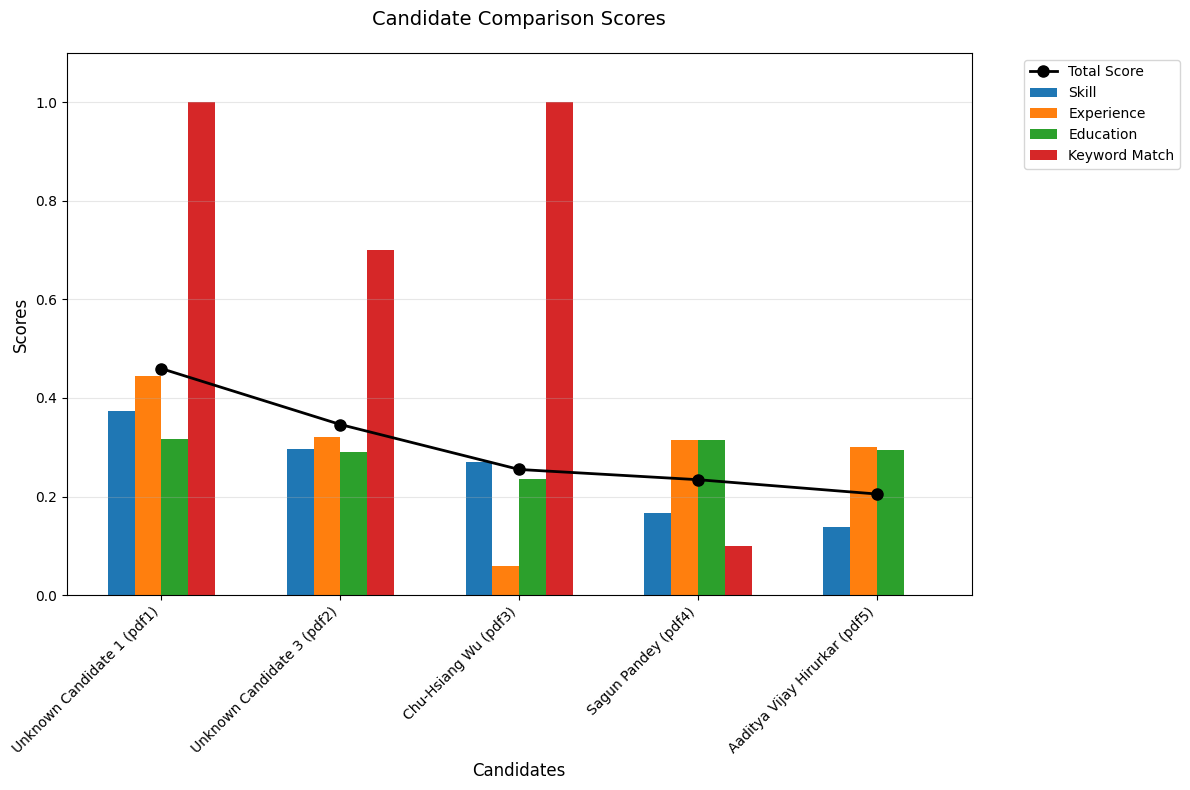

In [20]:
# [Keep all your existing code until the ranking part...]

# Rank candidates (your existing code)
# ranked_candidates = rank_candidates(resumes, job_description, model)

# Add PDF IDs to candidate names before displaying and plotting
for idx, candidate in enumerate(ranked_candidates):
    # Extract PDF ID from filename (e.g., "pdf1" from "resume_data_2_pdf1.json")
    pdf_id = re.search(r'pdf(\d+)\.json$', files[idx]).group(0).replace('.json', '')
    
    # Update candidate name with PDF ID
    if not candidate['Name'] or candidate['Name'].strip() == "":
        candidate['Name'] = f"Candidate_{pdf_id}"
    else:
        candidate['Name'] = f"{candidate['Name']} ({pdf_id})"

# Now display the results (your existing code)
for i, candidate in enumerate(ranked_candidates, 1):
    print(f"\nCandidate #{i}: {candidate['Name']}")
    print("-" * 40)
    print(f"Total Score: {candidate['Total Score']:.2f}/1.00")
    print(f"• Skill Score: {candidate['Skill Score']:.2f}")
    print(f"• Experience Score: {candidate['Experience Score']:.2f}")
    print(f"• Education Score: {candidate['Education Score']:.2f}")
    print(f"• Keyword Match: {candidate['Keyword Match Score']:.2f}")

# Plot scores (your existing code will now show PDF IDs)
plot_scores(ranked_candidates)